In [2]:
# Import necessary libraries
import os  # Provides functions for interacting with the operating system (e.g., file paths)
import pandas as pd  # Used for data manipulation and analysis with DataFrames
import numpy as np  # Provides numerical computing tools, including arrays and mathematical functions
import matplotlib.pyplot as plt  # Used for creating visualizations (plots, charts)
import seaborn as sns  # Built on top of matplotlib, provides a higher-level interface for statistical graphics
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Used for data preprocessing (scaling, encoding)
from sklearn.ensemble import RandomForestClassifier  # Implements the Random Forest classification algorithm
from sklearn.metrics import classification_report, confusion_matrix  # Used to evaluate model performance
from sklearn.linear_model import LogisticRegression  # Implements the Logistic Regression classification algorithm
from sklearn.tree import DecisionTreeClassifier  # Implements the Decision Tree classification algorithm
from sklearn.svm import SVC  # Implements the Support Vector Machine classification algorithm
from sklearn.neighbors import KNeighborsClassifier  # Implements the K-Nearest Neighbors classification algorithm


In [4]:
os.getcwd()

'/Users/sauravsurbirala/Downloads'

In [8]:
df = pd.read_csv('/Users/sauravsurbirala/Desktop/movie success prediction capstone project/movie_metadata.csv') # Load the dataset from a CSV file into a DataFrame

In [10]:
# Display the first five rows of the DataFrame to get an initial look at the data
df.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [64]:
# Generate descriptive statistics for numerical columns in the DataFrame
df.describe()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [66]:
df.info() # Display information about the DataFrame, including data types and non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [68]:
df.shape # Get the dimensions (number of rows and columns) of the DataFrame

(5043, 28)

In [70]:
df.isnull().sum() # Count the number of missing values in each column of the DataFrame

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

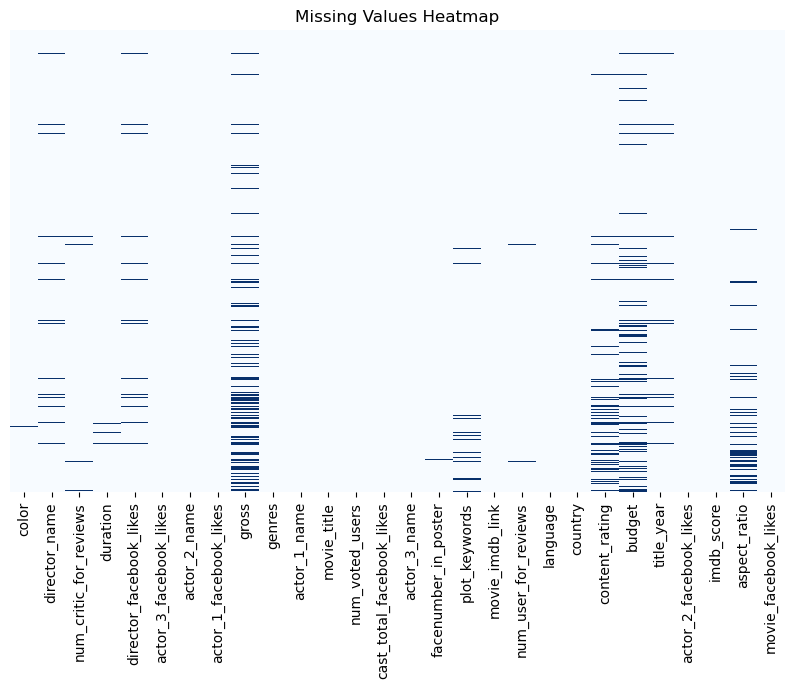

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="Blues", yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [74]:
# Fill missing values in each column with the mode (most frequent value)

# Categorical Columns
df['color'].fillna(df['color'].mode()[0], inplace=True)                 # Fill 'color' column with its most frequent value
df['language'].fillna(df['language'].mode()[0], inplace=True)           # Fill 'language' column with its most frequent value
df['country'].fillna(df['country'].mode()[0], inplace=True)             # Fill 'country' column with its most frequent value
df['director_name'].fillna(df['director_name'].mode()[0], inplace=True) # Fill 'director_name' column with its most frequent value
df['actor_2_name'].fillna(df['actor_2_name'].mode()[0], inplace=True)   # Fill 'actor_2_name' column with its most frequent value
df['actor_1_name'].fillna(df['actor_1_name'].mode()[0], inplace=True)   # Fill 'actor_1_name' column with its most frequent value
df['actor_3_name'].fillna(df['actor_3_name'].mode()[0], inplace=True)   # Fill 'actor_3_name' column with its most frequent value
df['genres'].fillna(df['genres'].mode()[0], inplace=True)               # Fill 'genres' column with its most frequent value
df['plot_keywords'].fillna(df['plot_keywords'].mode()[0], inplace=True) # Fill 'plot_keywords' column with its most frequent value
df['movie_title'].fillna(df['movie_title'].mode()[0], inplace=True)     # Fill 'movie_title' column with its most frequent value
df['title_year'].fillna(df['title_year'].mode()[0], inplace=True)       # Fill 'title_year' column with its most frequent value
df['aspect_ratio'].fillna(df['aspect_ratio'].mode()[0], inplace=True)   # Fill 'aspect_ratio' column with its most frequent value


/var/folders/91/klld2z_544z385zk_ggp4_xc0000gn/T/ipykernel_68399/3439954029.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['color'].fillna(df['color'].mode()[0], inplace=True)                 # Fill 'color' column with its most frequent value
/var/folders/91/klld2z_544z385zk_ggp4_xc0000gn/T/ipykernel_68399/3439954029.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will neve

In [76]:
# Numerical Columns
df['budget'].fillna(df['budget'].mode()[0], inplace=True)               # Fill 'budget' column with its most frequent value
df['gross'].fillna(df['gross'].mode()[0], inplace=True)                 # Fill 'gross' column with its most frequent value
df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].mode()[0], inplace=True) # Fill 'num_critic_for_reviews' with mode
df['num_voted_users'].fillna(df['num_voted_users'].mode()[0], inplace=True) # Fill 'num_voted_users' with its most frequent value
df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].mode()[0], inplace=True) # Fill 'num_user_for_reviews' with mode
df['movie_facebook_likes'].fillna(df['movie_facebook_likes'].mode()[0], inplace=True) # Fill 'movie_facebook_likes' with mode
df['actor_2_facebook_likes'].fillna(df['actor_2_facebook_likes'].mode()[0], inplace=True) # Fill 'actor_2_facebook_likes' with mode
df['actor_1_facebook_likes'].fillna(df['actor_1_facebook_likes'].mode()[0], inplace=True) # Fill 'actor_1_facebook_likes' with mode
df['cast_total_facebook_likes'].fillna(df['cast_total_facebook_likes'].mode()[0], inplace=True) # Fill 'cast_total_facebook_likes' with mode
df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].mode()[0], inplace=True) # Fill 'facenumber_in_poster' with mode
df['content_rating'].fillna(df['content_rating'].mode()[0], inplace=True) # Fill 'content_rating' with mode
df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].mode()[0], inplace=True) # Fill 'actor_3_facebook_likes' with mode
df['duration'].fillna(df['duration'].mode()[0], inplace=True)           # Fill 'duration' with its most frequent value
df['director_facebook_likes'].fillna(df['director_facebook_likes'].mode()[0], inplace=True) # Fill 'director_facebook_likes' with mode

/var/folders/91/klld2z_544z385zk_ggp4_xc0000gn/T/ipykernel_68399/2646080039.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['budget'].fillna(df['budget'].mode()[0], inplace=True)               # Fill 'budget' column with its most frequent value
/var/folders/91/klld2z_544z385zk_ggp4_xc0000gn/T/ipykernel_68399/2646080039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will nev

In [78]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [80]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

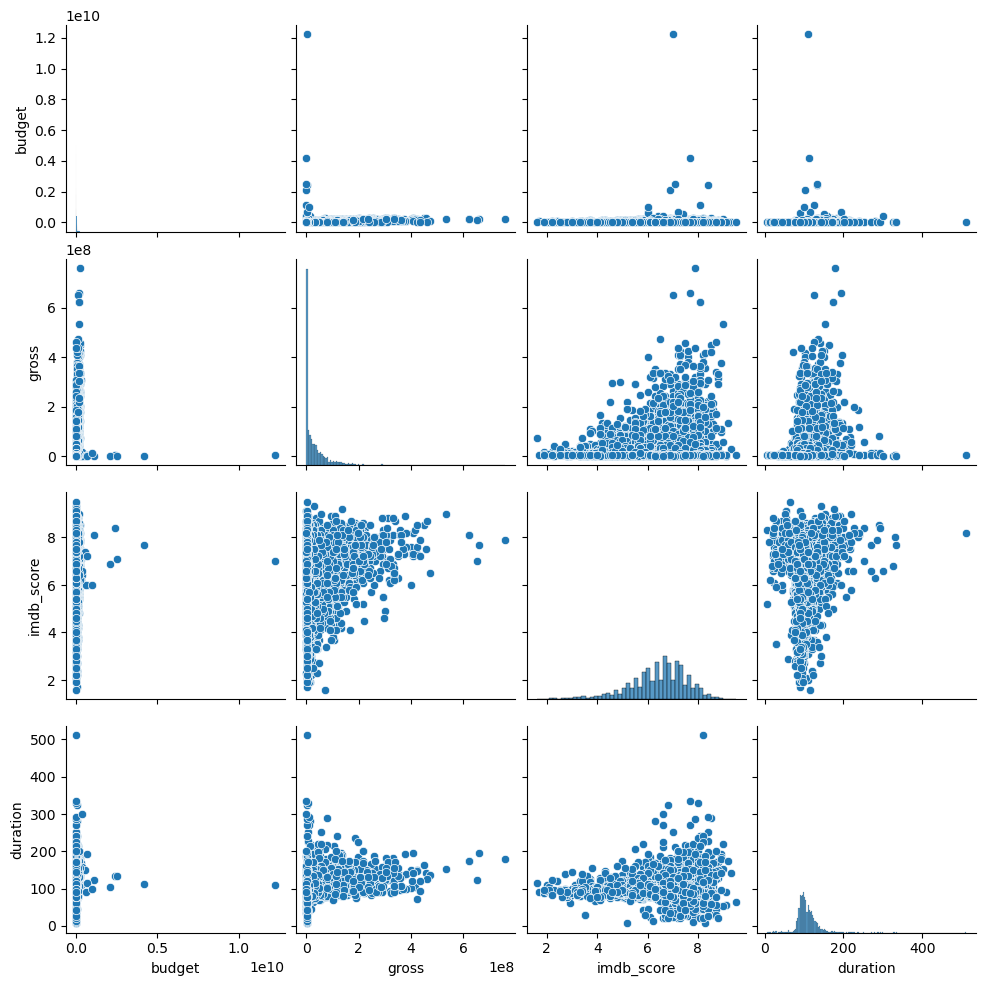

In [82]:
sns.pairplot(df[['budget', 'gross', 'imdb_score', 'duration']])


Text(0.5, 1.0, 'Movie Facebook Likes vs IMDB Score')

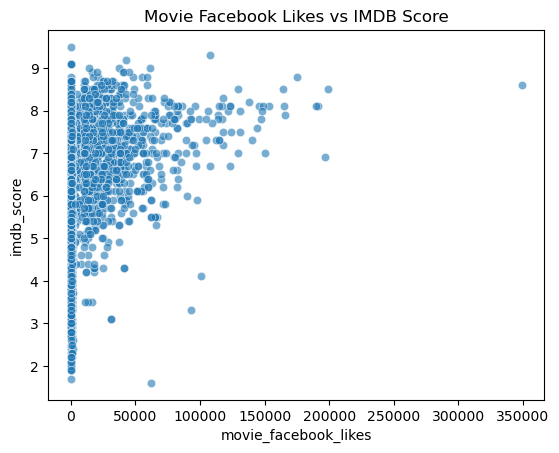

In [84]:
sns.scatterplot(data=df, x='movie_facebook_likes', y='imdb_score', alpha=0.6)
plt.title('Movie Facebook Likes vs IMDB Score')

In [86]:
!pip install wordcloud

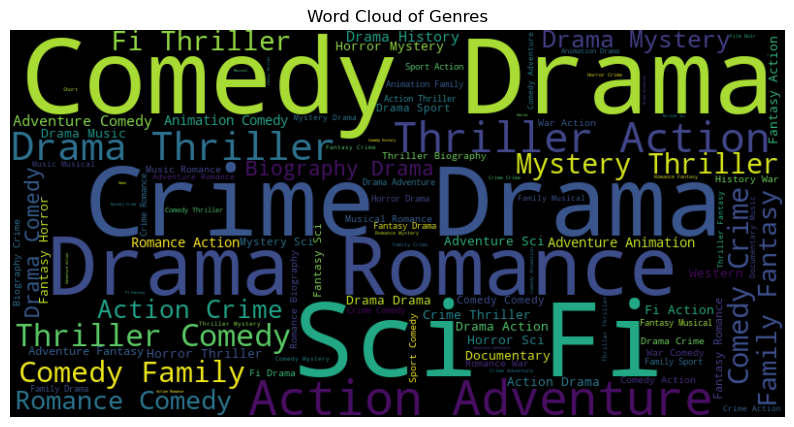

In [88]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(df['genres'].dropna()))

# Display Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Genres')
plt.show()


Text(0.5, 1.0, 'Average Budget Over Years')

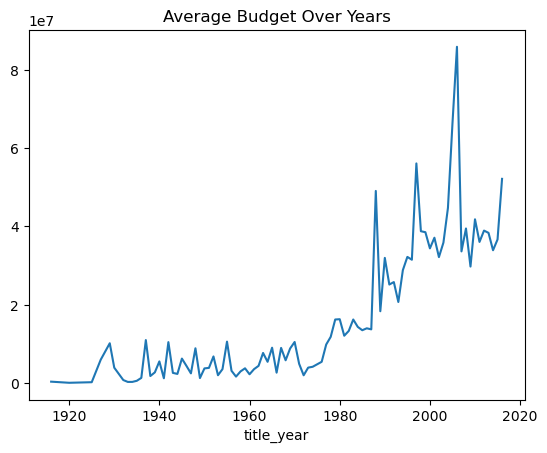

In [90]:
df.groupby('title_year')['budget'].mean().plot(kind='line')
plt.title('Average Budget Over Years')

In [92]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
le = LabelEncoder()

In [94]:
#Feature Engineering
#Create 'Classify' column based on IMDB score ranges

In [96]:
# Check if the 'imdb_score' column exists in your DataFrame
if 'imdb_score' in df.columns:
    # If it exists, proceed with applying the function
    def classify_movie(score):
        if score < 3:
            return 'Flop'
        elif 3 <= score < 6:
            return 'Average'
        else:
            return 'Hit'

    df['Classify'] = df['imdb_score'].apply(classify_movie)
    df['Classify'] = le.fit_transform(df['Classify'])

In [98]:
# One-Hot Encoding: Converts specified categorical columns into binary columns, dropping the first category to avoid multicollinearity
categorical_cols = ['color', 'genres', 'language', 'country', 'content_rating']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [100]:
df['Classify'] = le.fit_transform(df['Classify']) # Encodes the 'classify' column into numeric labels using LabelEncoder


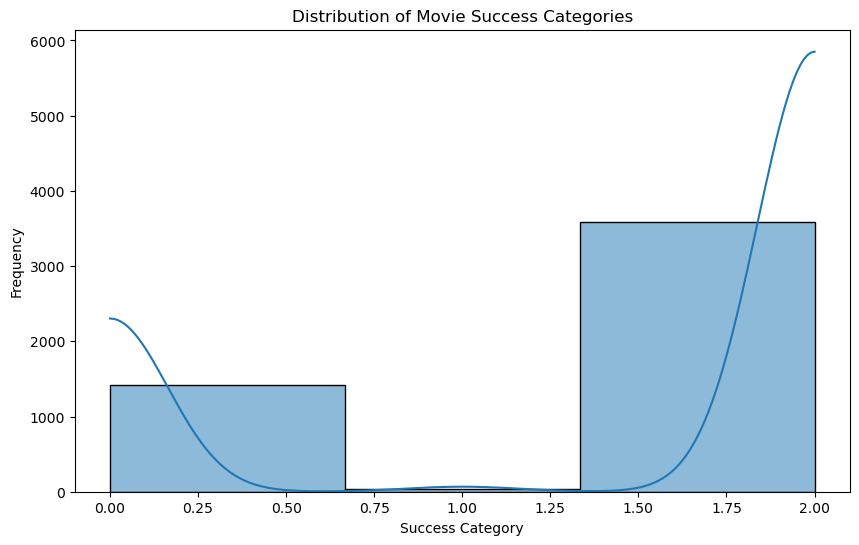

In [102]:
# Plotting the distribution of the 'classify' column with 3 bins and a KDE curve for smoothness
plt.figure(figsize=(10, 6)) # Set the size of the figure
sns.histplot(df['Classify'], bins=3, kde=True) # Histogram with KDE
plt.title('Distribution of Movie Success Categories') # Title of the plot
plt.xlabel('Success Category') # Label for the x-axis
plt.ylabel('Frequency') # Label for the y-axis
plt.show() # Display the plot

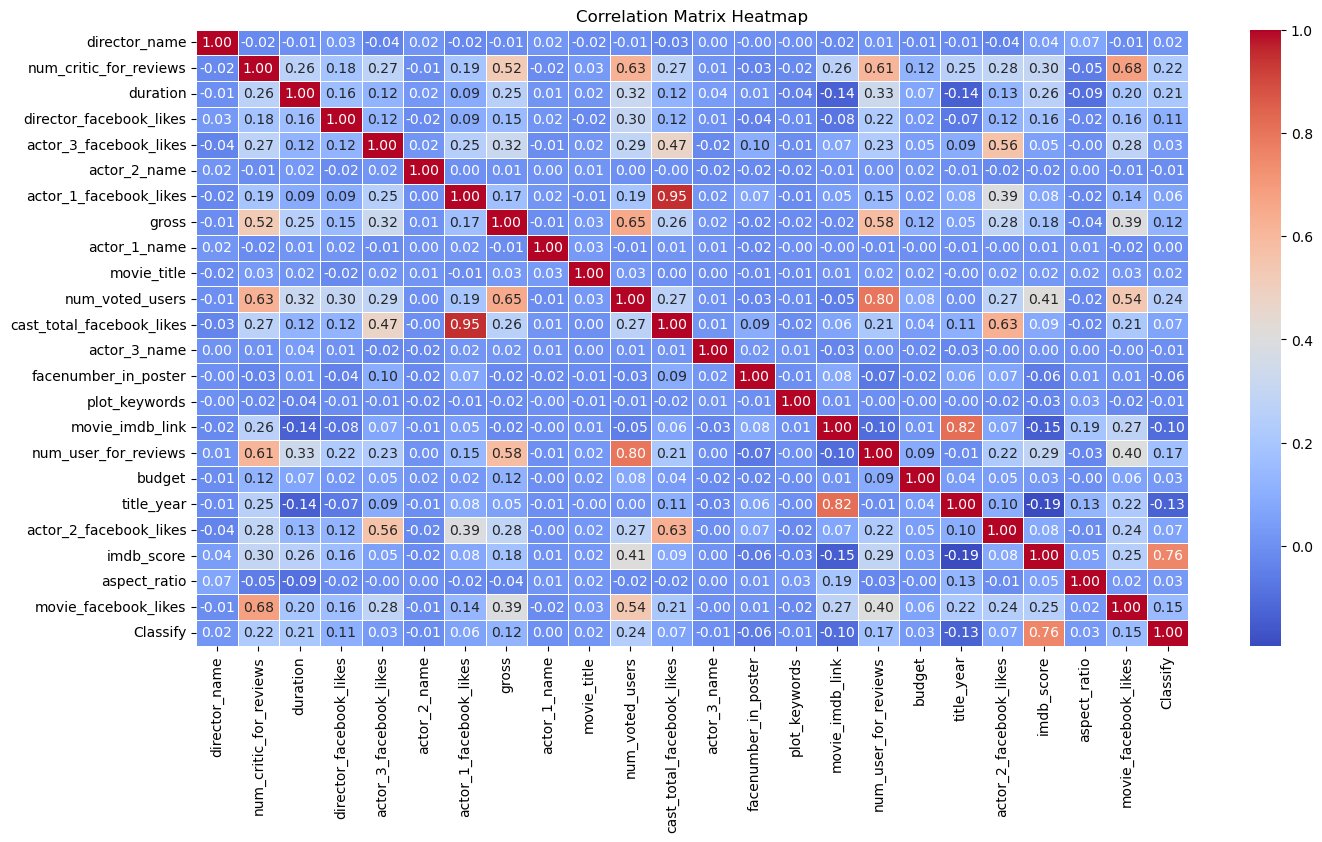

In [104]:


# Calculate correlation only on numeric features
correlation_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [106]:
# Encoding 'Classify' column for model compatibility
df['Classify'] = LabelEncoder().fit_transform(df['Classify'])


In [108]:
# Dropping irrelevant columns (you can adjust this based on dataset specifics)
irrelevant_columns = ['imdb_score']  # Drop original score column as it's now classified
# Check if the column exists before dropping
if 'imdb_score' in df.columns:
    df.drop(columns=irrelevant_columns, inplace=True)
else:
    print("Column 'imdb_score' not found in DataFrame. Skipping drop.")

In [110]:
# Splitting data into features and target variable
X = df.drop(columns=['Classify'])
y = df['Classify']

In [61]:
# Scaling numerical features
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [112]:
#Model Selection and Training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [114]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}


In [116]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


Training Random Forest...

Training Logistic Regression...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Decision Tree...

Training Support Vector Classifier...

Training K-Nearest Neighbors...


In [118]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Performance metrics
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Training Random Forest...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.40      0.52       268
           1       0.00      0.00      0.00        12
           2       0.80      0.96      0.87       729

    accuracy                           0.80      1009
   macro avg       0.52      0.45      0.46      1009
weighted avg       0.78      0.80      0.77      1009

Random Forest Confusion Matrix:
 [[106   0 162]
 [  5   0   7]
 [ 32   0 697]]

Training Logistic Regression...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.08      0.13       268
           1       0.00      0.00      0.00        12
           2       0.73      0.97      0.83       729

    accuracy                           0.72      1009
   macro avg       0.40      0.35      0.32      1009
weighted avg       0.65      0.72      0.64      1009

Logistic Regression Confusion Matrix:
 [[ 21   0 247]
 [  0   0  12]
 [ 24   0 705]]

Training Decision Tree...
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.56      0.53       268
           1       0.00      0.00      0.00        12
           2       0.82      0.79      0.81       729

    accuracy                           0.72      1009
   macro avg       0.44      0.45      0.45      1009
weighted avg       0.73      0.72      0.72      1009

Decision Tree Confusion Matrix:
 [[150   1 1

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

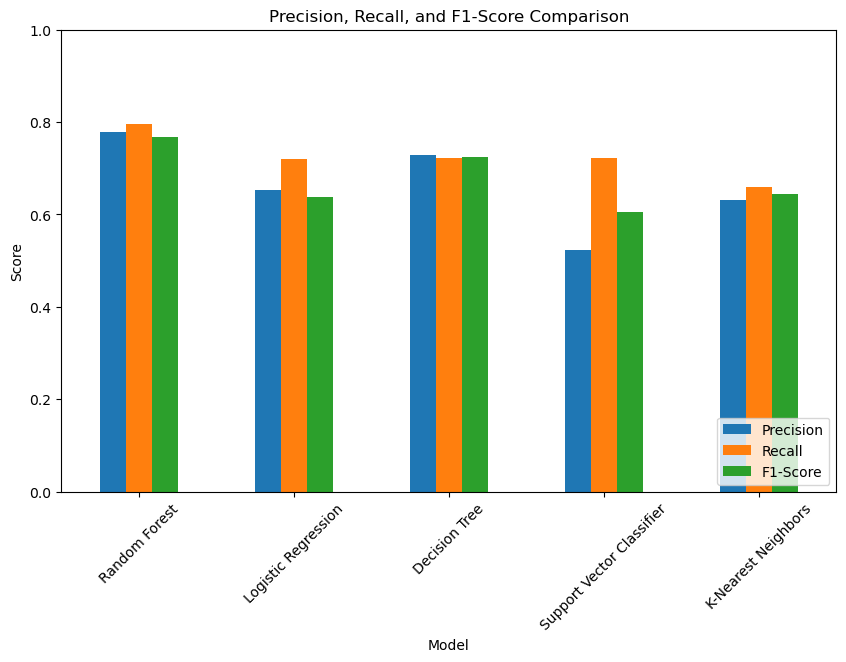

In [136]:
# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Classifier": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
}

# Assuming X and y are defined from your data preparation steps:
# Make sure X and y are defined before this line
# Example:
# X = df[['feature1', 'feature2', ...]]  # Replace with your actual feature columns
# y = df['target_variable']            # Replace with your actual target variable column

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.metrics import classification_report
import pandas as pd

metrics = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    metrics.append({
        "Model": name,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    })

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index("Model", inplace=True)

metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Precision, Recall, and F1-Score Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.legend(loc='lower right')
plt.show()

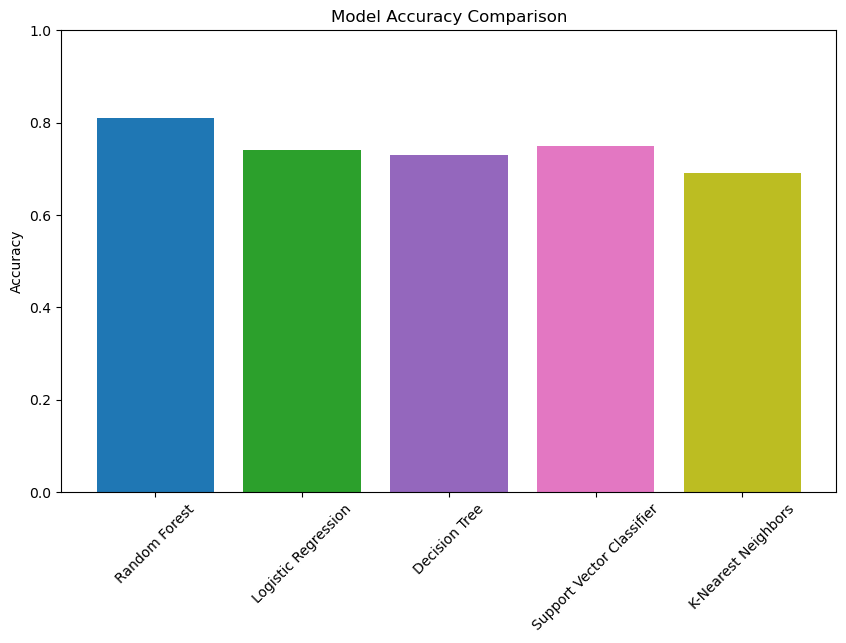

In [126]:
from matplotlib.cm import get_cmap

cmap = get_cmap('tab10')  # Use 'Set3' for pastel colors
colors = [cmap(i) for i in range(len(modela))]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()


In [128]:
# Visualizing performance of the best model (Random Forest for illustration)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


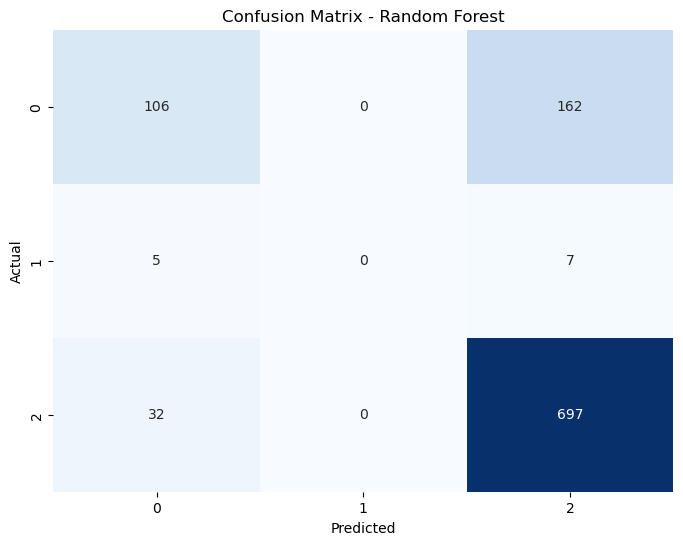

In [130]:
# Confusion matrix visualization for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

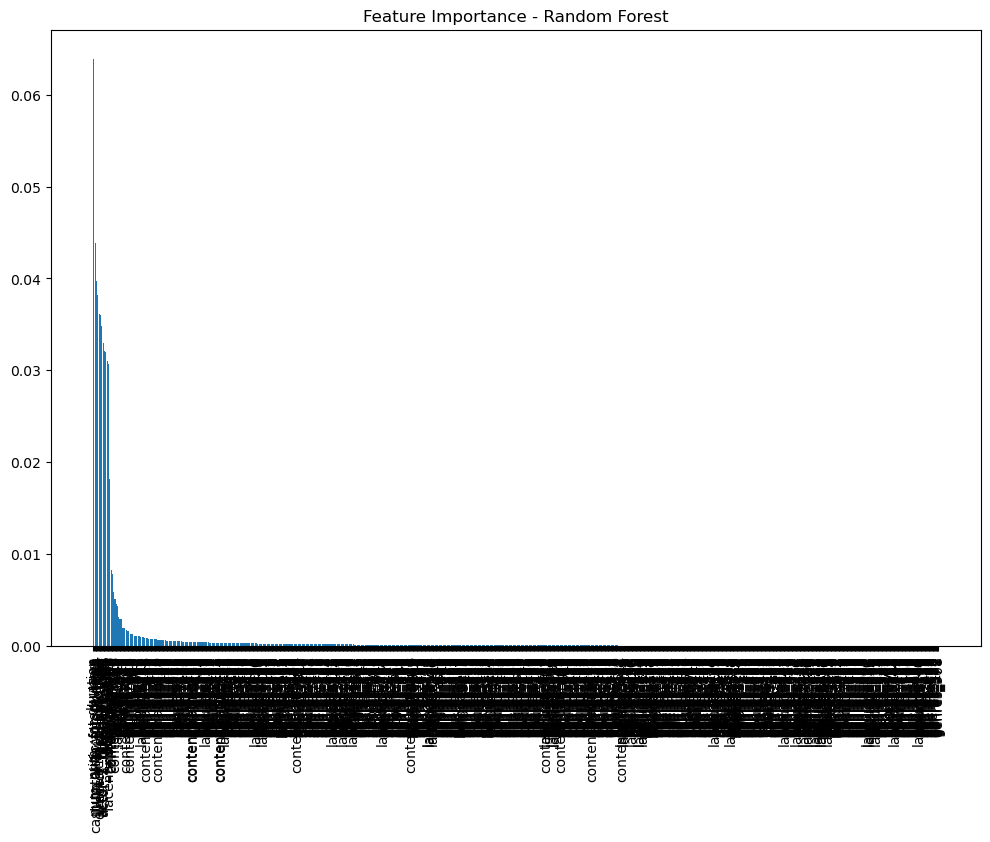

In [148]:
# Feature importance plot for Random Forest
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 8))
plt.bar(range(X.shape[1]), feature_importances[sorted_indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.title("Feature Importance - Random Forest")
plt.show()

In [144]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [150]:
# Confusion Matrix
y_pred = rf.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[106   0 162]
 [  5   0   7]
 [ 32   0 697]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.40      0.52       268
           1       0.00      0.00      0.00        12
           2       0.80      0.96      0.87       729

    accuracy                           0.80      1009
   macro avg       0.52      0.45      0.46      1009
weighted avg       0.78      0.80      0.77      1009



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [152]:
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV # Importing RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Assuming param_grid is the intended parameter distribution:
randomized_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, # Changed param_dist to param_grid
                                       n_iter=30, cv=3, n_jobs=-1, verbose=2, random_state=42)
randomized_search.fit(X_train, y_train)

print("Best Parameters:", randomized_search.best_params_)
best_rf = randomized_search.best_estimator_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-packa

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [37]:
from sklearn.ensemble import RandomForestClassifier
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)
baseline_accuracy = baseline_rf.score(X_test, y_test)
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.8116947472745293


In [38]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [39]:
randomized_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    scoring='accuracy',  # Replace 'accuracy' with 'roc_auc', 'f1', etc., based on your problem
    n_iter=20, cv=3, random_state=42
)

In [40]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    best_rf, X_train, y_train, cv=5, scoring='accuracy'
)
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

In [41]:
def save_model(model, filename):
    import joblib
    joblib.dump(model, filename)

In [42]:

randomized_search.fit(X_train, y_train)  # Fit the model to the data

best_model = randomized_search.best_estimator_  # Now you can access best_estimator_
save_model(best_model, 'best_model.pkl')

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
